# Connect To Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Read Data

In [ ]:
PATH = 'data/Dataset_A_loan.csv'

In [6]:
df = pd.read_csv(PATH)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# EDA

## Describe Data

In [7]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Info Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Check Null Data

In [10]:
print(f'Sum Missing Data {df.isnull().sum()}')

Sum Missing Data person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64


Total Missing value is 2250 at person_income

Solution : Imputation using Median or Model-Based

# Distribusi Target

In [11]:
print('Distribusi Target')

print(df['loan_status'].value_counts(normalize=True) * 100)

Distribusi Target
loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


Data is Imbalanced

Solutuon : SMOTE  for oversampling
           class_weight at training

## Numeric Fiture

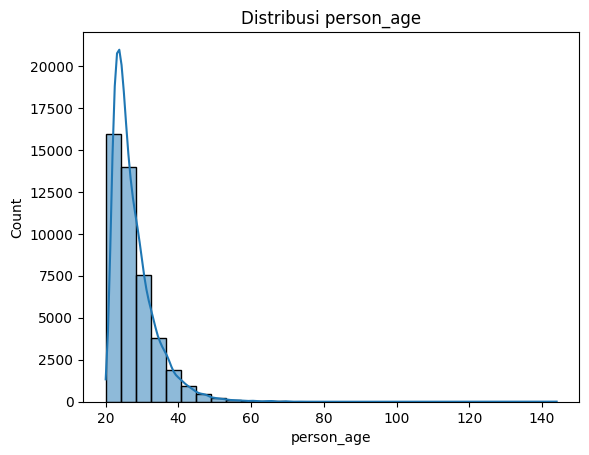

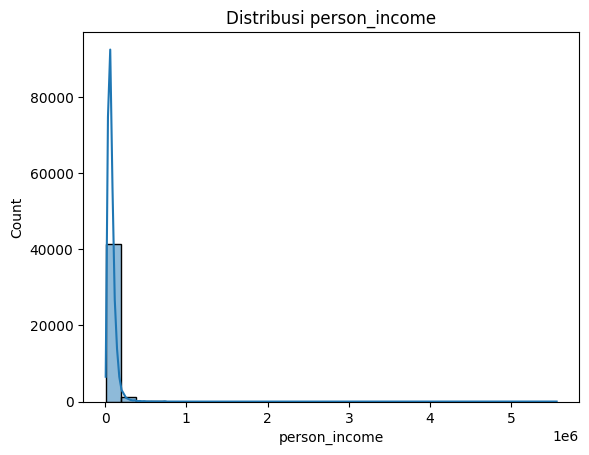

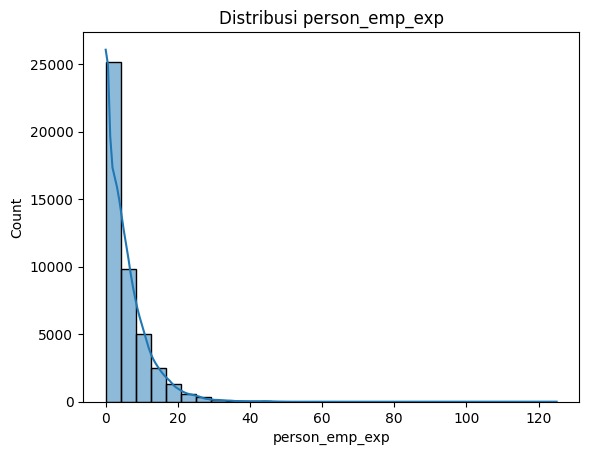

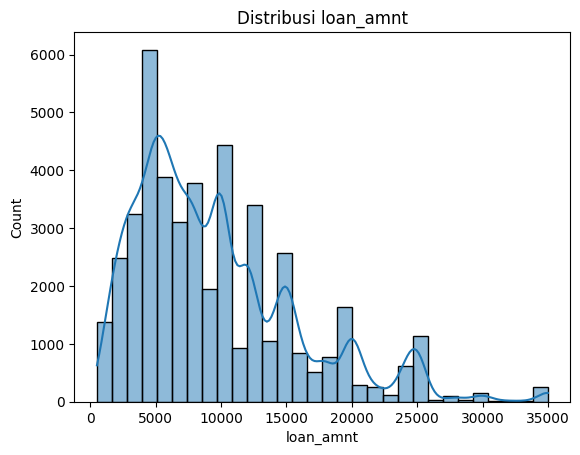

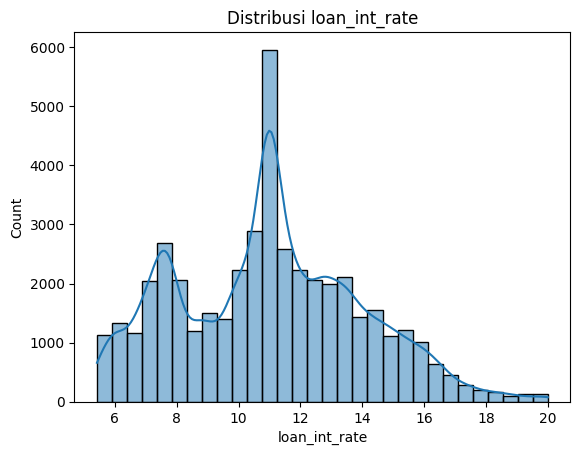

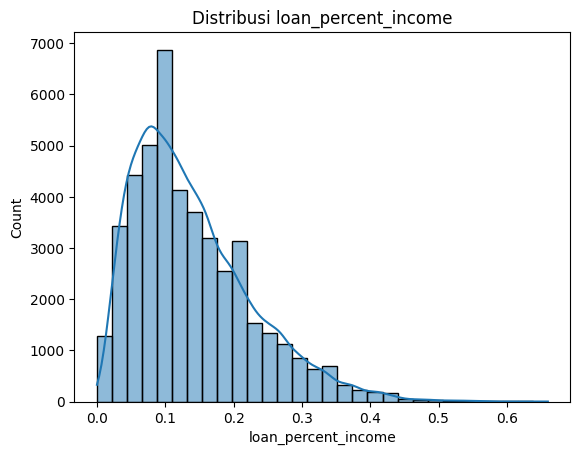

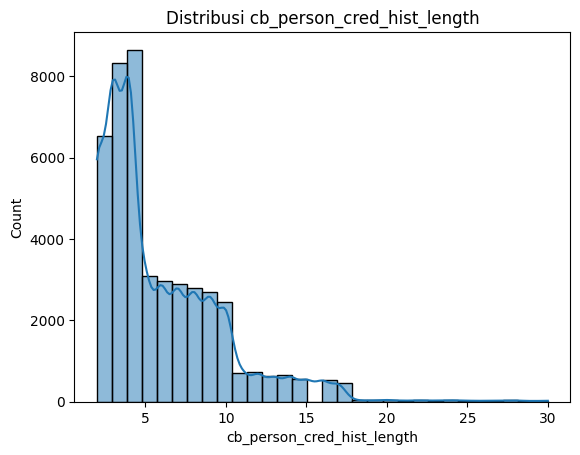

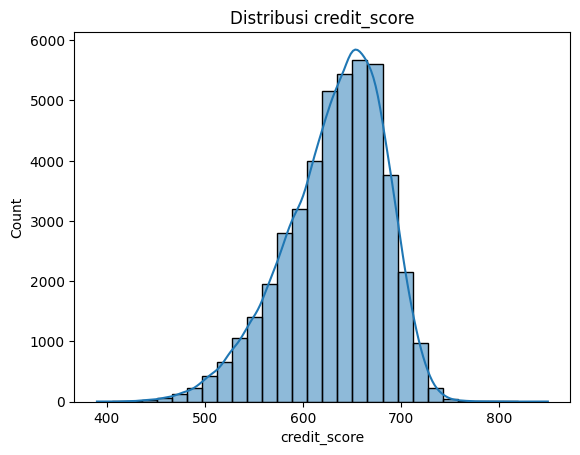

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns='loan_status').columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()

## Fitur Categorical

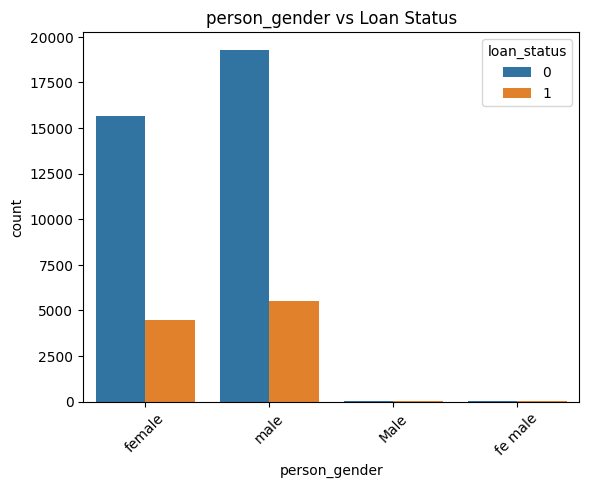

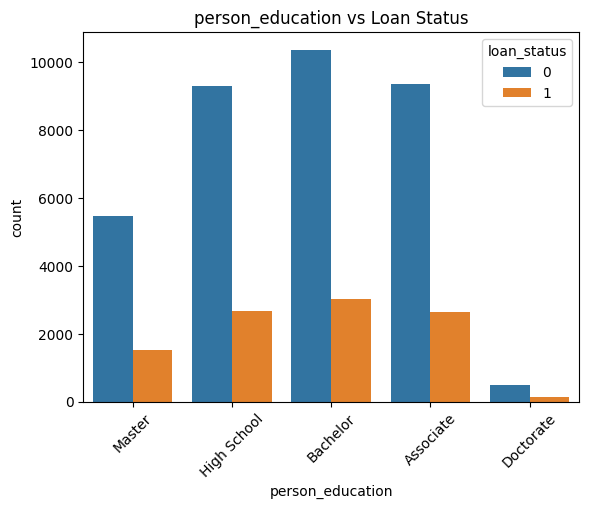

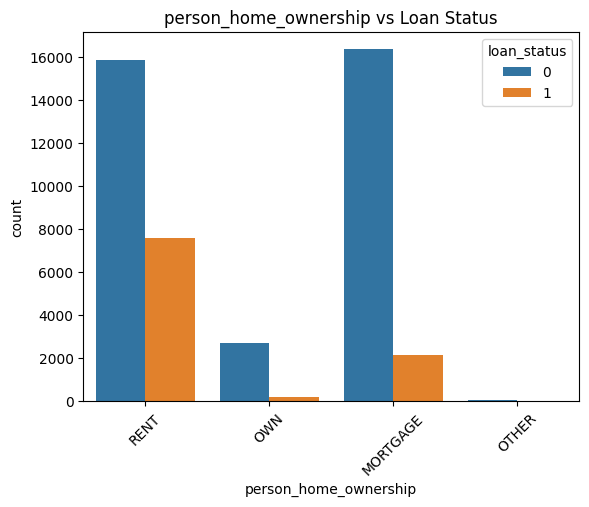

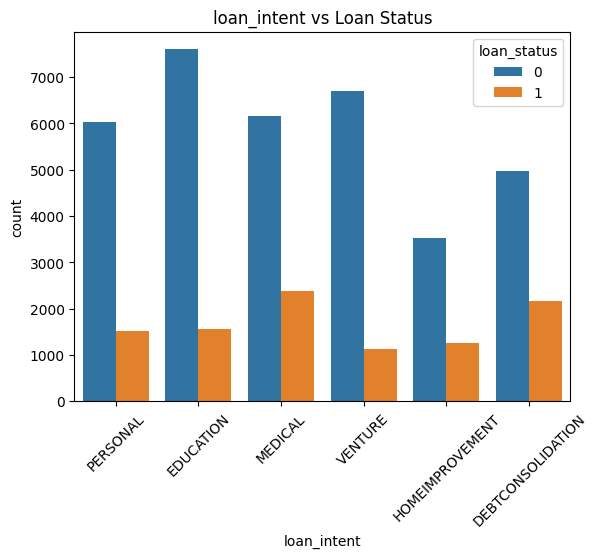

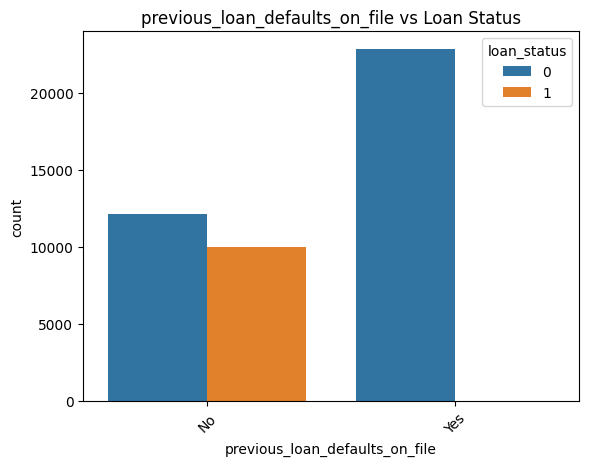

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.show()


## Crosstab insight

In [17]:
for col in categorical_cols:
  ct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
  print(f'\n{col} vs Loan Status : ')
  print(ct.round(2))



person_gender vs Loan Status : 
loan_status        0      1
person_gender              
Male           75.56  24.44
fe male        77.78  22.22
female         77.74  22.26
male           77.81  22.19

person_education vs Loan Status : 
loan_status           0      1
person_education              
Associate         77.97  22.03
Bachelor          77.48  22.52
Doctorate         77.13  22.87
High School       77.69  22.31
Master            78.24  21.76

person_home_ownership vs Loan Status : 
loan_status                0      1
person_home_ownership              
MORTGAGE               88.40  11.60
OTHER                  66.67  33.33
OWN                    92.48   7.52
RENT                   67.60  32.40

loan_intent vs Loan Status : 
loan_status            0      1
loan_intent                    
DEBTCONSOLIDATION  69.73  30.27
EDUCATION          83.04  16.96
HOMEIMPROVEMENT    73.70  26.30
MEDICAL            72.18  27.82
PERSONAL           79.86  20.14
VENTURE            85.57  14.43

p

# Preprocessing

## Handle Missing value at person_income column

In [19]:
imputer = SimpleImputer(strategy='median')

df['person_income'] = imputer.fit_transform(df[['person_income']])

In [20]:
print(f'Sum Missing Data {df.isnull().sum()}')

Sum Missing Data person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


## Encoding Fitur Categorical

In [21]:
categorical_cols = df.select_dtypes(include='object').columns

label_encoder = {}
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoder[col] = le


In [22]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,2,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,2,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,2,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,2,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,3,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


## Scaling / Normalization Fitur Numerik

In [23]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns = 'loan_status').columns

scaler =  StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [24]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,-1.083918,1.525264,-0.105967,-0.892284,0.904822,4.024953,0.852919,1.683039,4.016394,-0.739109,-1.419814,-1.016040,1
1,-1.118963,-1.083918,0.849192,-0.940320,-0.892284,0.210609,-1.359209,-0.882904,0.044782,-0.684829,-0.996863,-2.549975,0.984213,0
2,-0.457264,-1.083918,0.849192,-0.938138,-0.397517,-1.177817,-0.646600,0.274312,0.625557,3.443074,-0.739109,0.047412,-1.016040,1
3,-0.788113,-1.083918,-0.502953,0.003176,-0.892284,0.904822,4.024953,0.274312,1.417829,3.443074,-0.996863,0.840507,-1.016040,1
4,-0.622689,0.893713,1.525264,-0.187254,-0.727362,0.904822,4.024953,0.274312,1.095549,4.475050,-0.481354,-0.924130,-1.016040,1


## Splitting Data

In [26]:
X = df.drop(columns='loan_status')
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'Shape X_train {X_train.shape}')
print(f'Shape y_train {y_train.shape}')
print(f'Shape X_test {X_test.shape}')
print(f'Shape y_test {y_test.shape}')



Shape X_train (36000, 13)
Shape y_train (36000,)
Shape X_test (9000, 13)
Shape y_test (9000,)


# Modeling

In [29]:
rf =  RandomForestClassifier(random_state=42)

xbg = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)



# Training

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
xbg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Evaluate

In [33]:
def evaluate(model ,name):
  y_pred = model.predict(X_test)
  print(f'================= {name} ==============')
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('\n')

In [34]:
evaluate(rf, 'Random Forest')
evaluate(xbg, 'XGB Class')


================= Random Forest ==============
[[6808  192]
 [ 456 1544]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.89      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



================= XGB Class ==============
[[6806  194]
 [ 393 1607]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.89      0.80      0.85      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000





# Save Model to Pickle

In [36]:
best_model = xbg

with open('/content/drive/MyDrive/Private Class Nico - Dasar Pemrograman Web/Streamlit/best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

print('Model Have been saved')

Model Have been saved
